<a href="https://colab.research.google.com/github/zulfiqaralimir/Financial-Econometrics/blob/master/MONTE_CARLO_SIMULATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (12, 9)  # Figure size and width

## **1. Deterministic Models**

**Deterministic models** are models that **do not have a random term**. Let's look at one example. Assume you put \$10 dollars in an investment account at the beginning of each month. The account would give you a **fixed annual interest** of 40% compounding monthly. We can use the following equation to calculate the amount of money you will get by the end of a year.

$$ \sum_{i=0}^{11} P_t \big(1 + \frac{r}{12} \big)^{12-i} $$

where $P_t$ is the amount of money put in at the beginning of each month and $r$ is the fixed annual interest rate.


**Figure 1: Deterministic Model: Cumulative Account Balance with Monthly $10 Dollars Investment and Fixed Annual Interest**


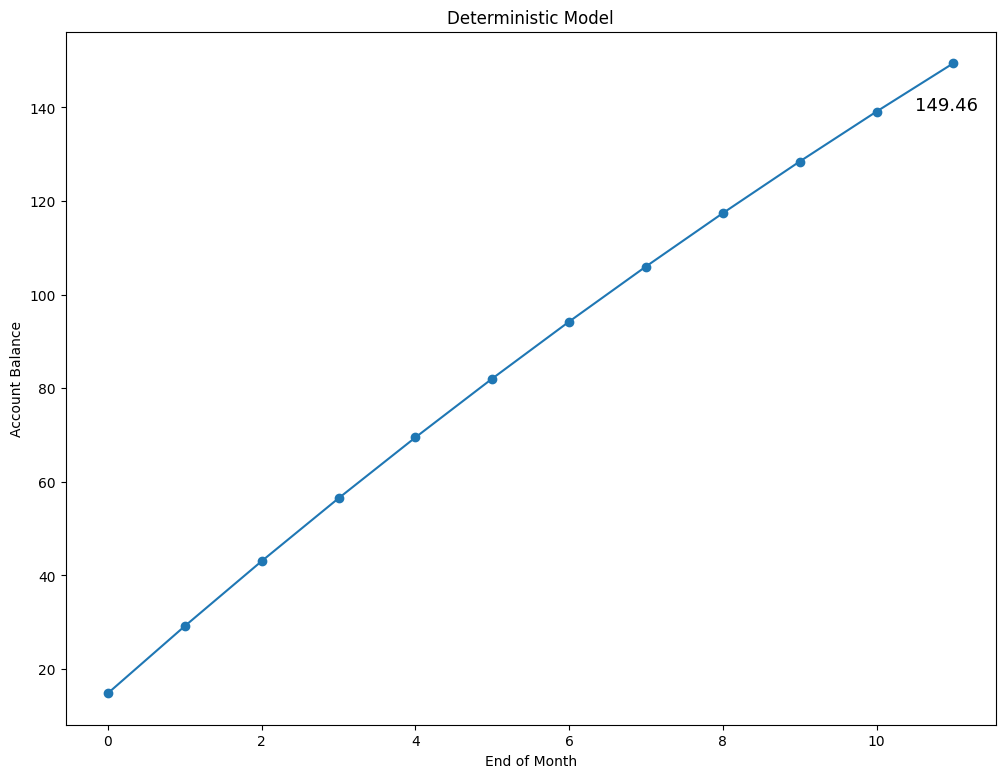

In [ ]:
# Deterministic Model
month = np.linspace(start=1, stop=12, num=12)
x = []

for i in range(12):
    x.append(10 * (1 + 0.4 / 12) ** (12 - i))

cum_x = np.cumsum(x)

# Plot
plt.plot(cum_x, marker="o")
plt.title("Deterministic Model")
plt.xlabel("End of Month")
plt.ylabel("Account Balance")
plt.annotate(
    round(cum_x[11], 2), (10.5, cum_x[11] - 10), fontsize=13
)  # Annotate last point
plt.show()

Figure 1 shows the cumulative account balance at the end of each month. With this model, we can **accurately predict** how much money is in the account at each month's end. There is **no uncertainty within this model**. If one invests \\$10 dollars at the beginning of every month, one will get \\$149.46 dollars by the end of the year. One can be **100% sure** how much money will be in the account after one year if the amount of monthly investment is known in advance.

A deterministic model will produce the same result given the input information is fixed. Repeated prediction processes with the same input for a deterministic model will not change the prediction outcome. **Other common deterministic models are principal component analysis and factor analysis**. The **classification or cluster analysis** we will discuss later in Lesson 4 is also a deterministic model. In contrast to the deterministic model, **a stochastic model will have a random component in the model**.


## **2. Stochastic Models**

**A stochastic model** is a model that **has a random and unknown component in it**. Let's go back to the example in the last section. Assume you put \$10 dollars in an investment account at the beginning of each month. However, now the account would give you a **variable annual interest** adjusting and compounding monthly. The annual interest rate is a random variable and, for instance, follows a normal distribution with mean 40%. We cannot know the definitive numbers of all future interest revenues from the investment at time 0. There is uncertainty in predicting the future cumulative account balance. We can use the following equation to calculate the amount of money you will get by the end of a year.

$$ \sum_{i=0}^{11} P_t \big(1 + \frac{r_t}{12} \big)^{12-i} $$

where $P_t$ is the amount of money put in at the beginning of each month and $r_t$ is the annual interest rate adjusted each month.

In this case, we have introduced an uncertain component, the variable annual interest rate. In the following figure, we sample 12 interest rates from the normal distribution with mean 40% and apply them to the above model to come up with one possible account balance outcome for each month in a year.


**Figure 2: Stochastic Model: Cumulative Account Balance with a Monthly $10 Dollar Investment and Variable Annual Interest**

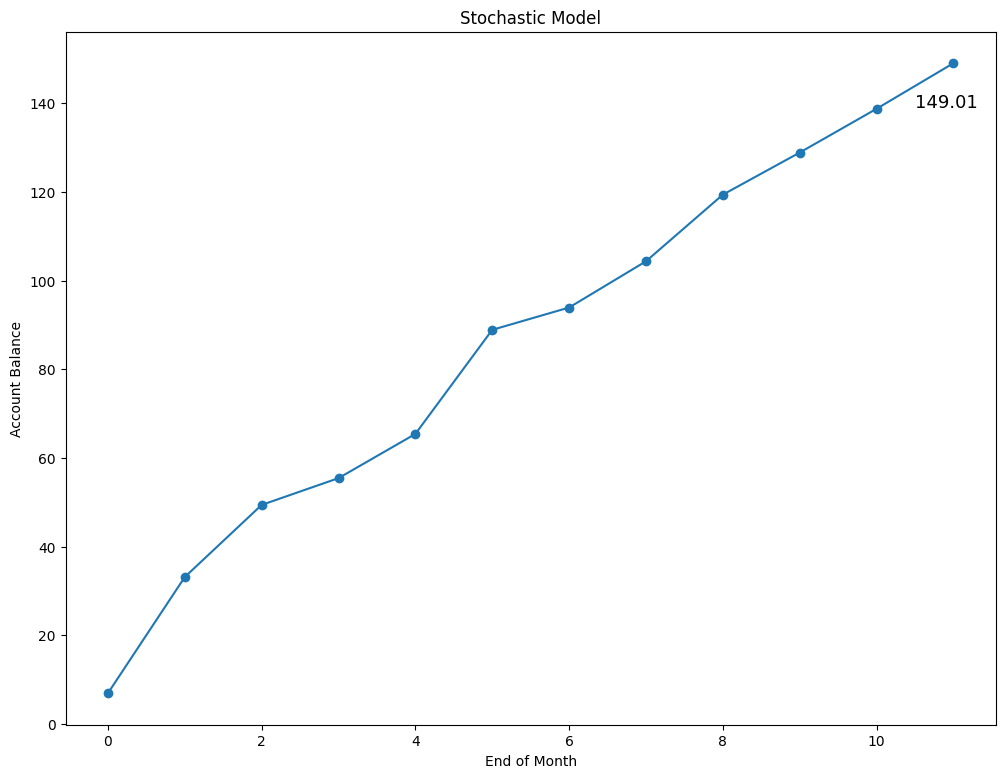

In [ ]:
# Stochastic model 1
np.random.seed(123)
int_1 = np.random.normal(0.4, 0.7, 12)  # np.random.normal(mean, sd, size)
bal_1 = []

for i in range(12):
    bal_1.append(10 * (1 + int_1[i] / 12) ** (12 - i))

cum_bal_1 = np.cumsum(bal_1)

# Plot
plt.plot(cum_bal_1, marker="o")
plt.title("Stochastic Model")
plt.xlabel("End of Month")
plt.ylabel("Account Balance")
plt.annotate(round(cum_bal_1[11], 2), (10.5, cum_bal_1[11] - 10), fontsize=13)
plt.show()

From figure 2, we can see the trend in the stochastic model is **going up and is similar to the case for the deterministic model**. However, a stochastic model **has a squiggly line instead of a smooth line** as in a deterministic model. This squiggly pattern comes from the fact that the variable annual interest rates applied to each month are different. Unlike a deterministic model, at time 0, the stochastic model cannot predict a precise number for what the account balance will be by the end of the year. We know the variable annual interest comes from a normal distribution with **a mean of 40%, but we do not know the definite numbers**. What we can do is sample 12 numbers from the distribution and apply them to the model to predict the account balance in a year. This is what we did in this example. However, if we repeat the same prediction process—sample another 12 numbers from the distribution and apply them to the model—we will very likely get another predicted account balance in a year. Every time we repeat the prediction process, we get a different account balance. The key difference between the deterministic model and stochastic model is that the prediction from the deterministic model is always the same no matter how many times one repeats the prediction process. However, the prediction outcome will be different from a stochastic model each time a researcher repeats the prediction process as shown in the following plot.


**Figure 3: Three Different Prediction Paths for a Stochastic Investment Account Balance Model**


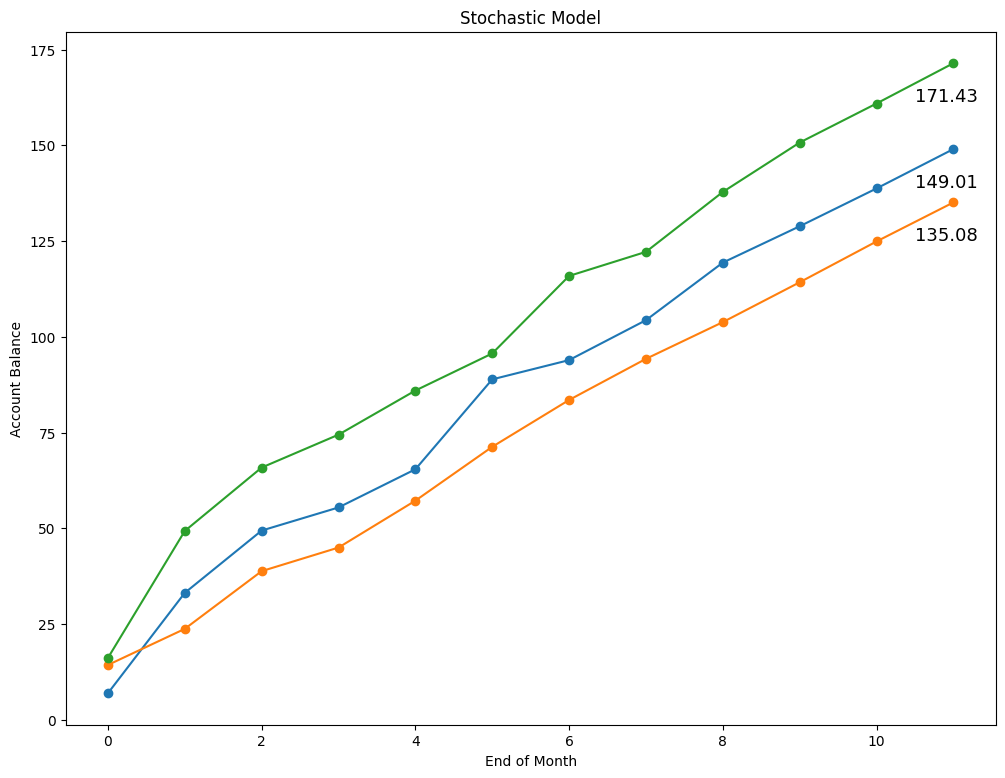

In [ ]:
# Three different prediction paths

# Stochastic model 2
np.random.seed(375)
int_2 = np.random.normal(0.4, 0.7, 12)
bal_2 = []

for i in range(12):
    bal_2.append(10 * (1 + int_2[i] / 12) ** (12 - i))

cum_bal_2 = np.cumsum(bal_2)


# Stochastic model 3
np.random.seed(999)
int_3 = np.random.normal(0.4, 0.7, 12)
bal_3 = []

for i in range(12):
    bal_3.append(10 * (1 + int_3[i] / 12) ** (12 - i))

cum_bal_3 = np.cumsum(bal_3)


# Plot three stochastic model lines
plt.plot(cum_bal_1, marker="o")
plt.plot(cum_bal_2, marker="o")
plt.plot(cum_bal_3, marker="o")
plt.title("Stochastic Model")
plt.xlabel("End of Month")
plt.ylabel("Account Balance")
plt.annotate(round(cum_bal_1[11], 2), (10.5, cum_bal_1[11] - 10), fontsize=13)
plt.annotate(round(cum_bal_2[11], 2), (10.5, cum_bal_2[11] - 10), fontsize=13)
plt.annotate(round(cum_bal_3[11], 2), (10.5, cum_bal_3[11] - 10), fontsize=13)
plt.show()

In figure 3, we show **three predicted cumulative account balance paths of the stochastic model**. As you can see, all three of them **follow the same trend in general with different variations**. Their predicted outcomes for cumulative account balances by the end of a year are also different, as the plot indicates. This is the key difference between a deterministic model and a stochastic model. In a stochastic model, for each prediction activity, **because of the random component in the model, you get a new line when you have a new set of sampled input data**. In a deterministic model, no matter how many times you run prediction activities, you should always get the same line.

The **linear regression model is an example of stochastic models**. As long as there is **a random element with a probability distribution in a model, this model is a stochastic model**.


## **3. Monte Carlo Simulation**

### **3.1 An Overview of Monte Carlo Simulation**

In the last section, we learned that a stochastic model would generate a different prediction outcome for each prediction run due to the random component within the model. The prediction outcome of a stochastic model is not definite. We can generate samples from independent random variables in a stochastic model and apply them to the model to derive one predicted outcome. In the last section, we drew three sets of sampled data to generate three predicted lines in figure3. We can repeat the process multiple times, and we will get multiple predicted cumulative account balances. These predicted outcomes will **form a distribution**. We can calculate the average and use the average as our final prediction for the cumulative account balance. However, how accurate is this averaged cumulative account balance? We can use the variance derived from the distribution from sampled data to conduct statistical tests to check the accuracy of the averaged outcome. This technique is called **Monte Carlo (MC) simulation*8.

In general, we only have one set of realized datasets in a real-world project. For example, we only have one set of Google's historical stock price to analyze. However, if we have some idea what the probability distribution of Google's stock price should be or use Google's historical price to form an empirical distribution, with MC simulation, we can sample repeatedly from this distribution to generate several sets of samples and apply them to the model to generate predicted outcomes. Then, we use these predicted outcomes to conduct inferential statistics. Hence, we can see MC simulation as a random sampling technique from a probability distribution to estimate an unknown population parameter.

MC simulation is based on two important statistics theories: law of large numbers (LLN) and central limit theorem (CLT).


### **3.2 Law of Large Numbers and Central Limit Theorem**

Let's quickly review LLN and CLT first. Assume we have a sequence of **identically and independently distributed** n random variables $x_1, x_2, \cdots, x_n$. All the random variables have mean $\mu$ and variance $\sigma^2$. Let's define the average of the sequence as follows:

$$ y_n = \frac{x_1+x_2+...+x_n}{n}, \ \text{ where } n = 1, 2, \cdots $$

The law of large numbers states that $y_n$ will converge to $\mu$ as $n \to \infty$.

Let's also define $z_n$ as follows:

$$ z_n = \frac{(x_1-\mu) + (x_2-\mu) + \cdots + (x_n-\mu)}{\sqrt{n}} $$

The central limit theorem states that $z_n$ will converge to $N(0, \sigma^2)$ as $n \to \infty$.


### **3.3 Estimators for Unknown Stochastic Model Outcome Expected Value and Variance**

**According to the law of large numbers, the average of a very large sample is a good approximation of the unknown model outcome, meaning $\mu$. Hence, if we run random samplings for $m$ times to get $m$ model outcomes and $m$ is large enough, the sample average**

$$ \overline{\mu} = \frac{1}{m} \sum_{i=1}^{m} x_i $$

will be a good approximation of $\mu$.

Also, we can obtain an estimate of the variance from the samples using the formula:

$$ \sigma^2_m = \frac{\sum_{i=1}^{m} (x_i - \overline{\mu})^2}{m-1} $$

According to central limit theorem, we can write the following equation:

$$ \overline{\mu} - \mu\sim \frac{\sigma}{\sqrt{m}} z , \ \text{ where } z \sim N(0,1) $$

Hence, $\bar{\mu}$ converges to $\mu$ **with speed of** $\frac{\sigma}{\sqrt{m}}$ as $m$ is large enough.

With the above information, we can construct a 95% confidence interval as follows:

$$ \Big[\overline{\mu} - \frac{1.96\sigma_m}{\sqrt{m}}, \ \ \overline{\mu} + \frac{1.96\sigma_m}{\sqrt{m}} \Big] $$

where $\sigma_m$ is the standard deviation of sampled outcomes.

From introductory statistics, we know that the true value has a 95% chance of being within the confidence interval. The **width of the confidence interval is used as a measure of the precision of the estimate**.

We can see that the **width is controlled by two elements: the number of sampling frequencies and the variance of the sampled outcomes**.

> **a.** The size of number of sampling frequencies m: as m goes up, the width of the CI shrinks. <br>
> **b.** The variance of the sampled outcomes $\sigma^2_m$: as $\sigma^2_m$ goes up, the width of the CI expands.

Therefore, in order to increase the precision of the Monte Carlo simulation, we can either increase the number of simulations or reduce the variance of the outcome variable. In this lesson, we will focus on increasing the number of simulations to improve Monte Carlo simulation results. For those who are interested in reducing the variance of the outcome variable, you can **research variance reduction techniques online**.


### **3.4 Monte Carlo Simulation Application: Investment Account Balance Stochastic Model**





Let's use our investment account balance stochastic model as an example to run Monte Carlo simulation. The stochastic model is as follows:

$$ \sum_{i=0}^{11} 10 \big(1 + \frac{r_t}{12} \big)^{12-i} $$

Where $r_t$ is the annual interest rate adjusted each month.

We will put in $10 dollars at the beginning of each month for a year or 12 months. The variable annual interest rate follows a normal distribution with mean of 40% and standard deviation of 0.7. We would like to forecast the account balance by the end of a year.

Here are the **steps to run a Monte Carlo simulation** to get samples of year-end account balance:

> 1. Sample 12 rates from variable annual interest rate distribution $N$(40\%, 0.7).  <br>
> 2. Apply 12 rates into the model and generate one data point for year-end account balance.  <br>
> 3. Repeat step 1 and step 2 $m$ times to get $m$ data points for year-end account balance.  <br>
> 4. Calculate the mean and standard deviation of the $m$ data points and construct confidence intervals.  <br>

For our investment account balance model, we will run MC simulations 100 times, 1,000 times, 100,000 times, and 1 million times to compare the results. The following plots and tables show the simulation results from different runs.


**Figure 4: MC Simulation with 100 Trials, 1,000 Trials, 100,000 Trials and 1 Million Trials**


In [ ]:
# Monte Carlo Simulation


# Helper function that plots histogram and prints statistics
def Hist(trials):
    res = []

    # Simulate Monte Carlo sample
    for j in range(trials):
        int = np.random.normal(0.4, 0.7, 12)
        bal = []

        for i in range(12):
            bal.append(10 * (1 + int[i] / 12) ** (12 - i))

        res.append(sum(bal))

    # Plot Histogram
    plt.hist(res, bins=30, density=True, histtype="stepfilled", alpha=0.7)
    plt.title("Histogram of {} Simulations".format(trials))
    plt.xlabel("Cumulatice Account Balance")
    plt.ylabel("Frequency")

    # Add statistics
    avg = np.mean(res)  # Mean
    sigma = np.std(res)  # Std
    lowb = avg - 1.96 * sigma / np.sqrt(trials)  # Low Bound
    upb = avg + 1.96 * sigma / np.sqrt(trials)  # Upper Bound
    width = upb - lowb

    textstr = "{0} trials\n Average: {1:.2f}\nStandard Dev: {2:.2f}\
\n Upper Bound: {3:.2f}\n Low Bound: {4:.2f}\n Width: {5:.2f}".format(
        (trials), (avg), (sigma), (upb), (lowb), (width)
    )
    return textstr

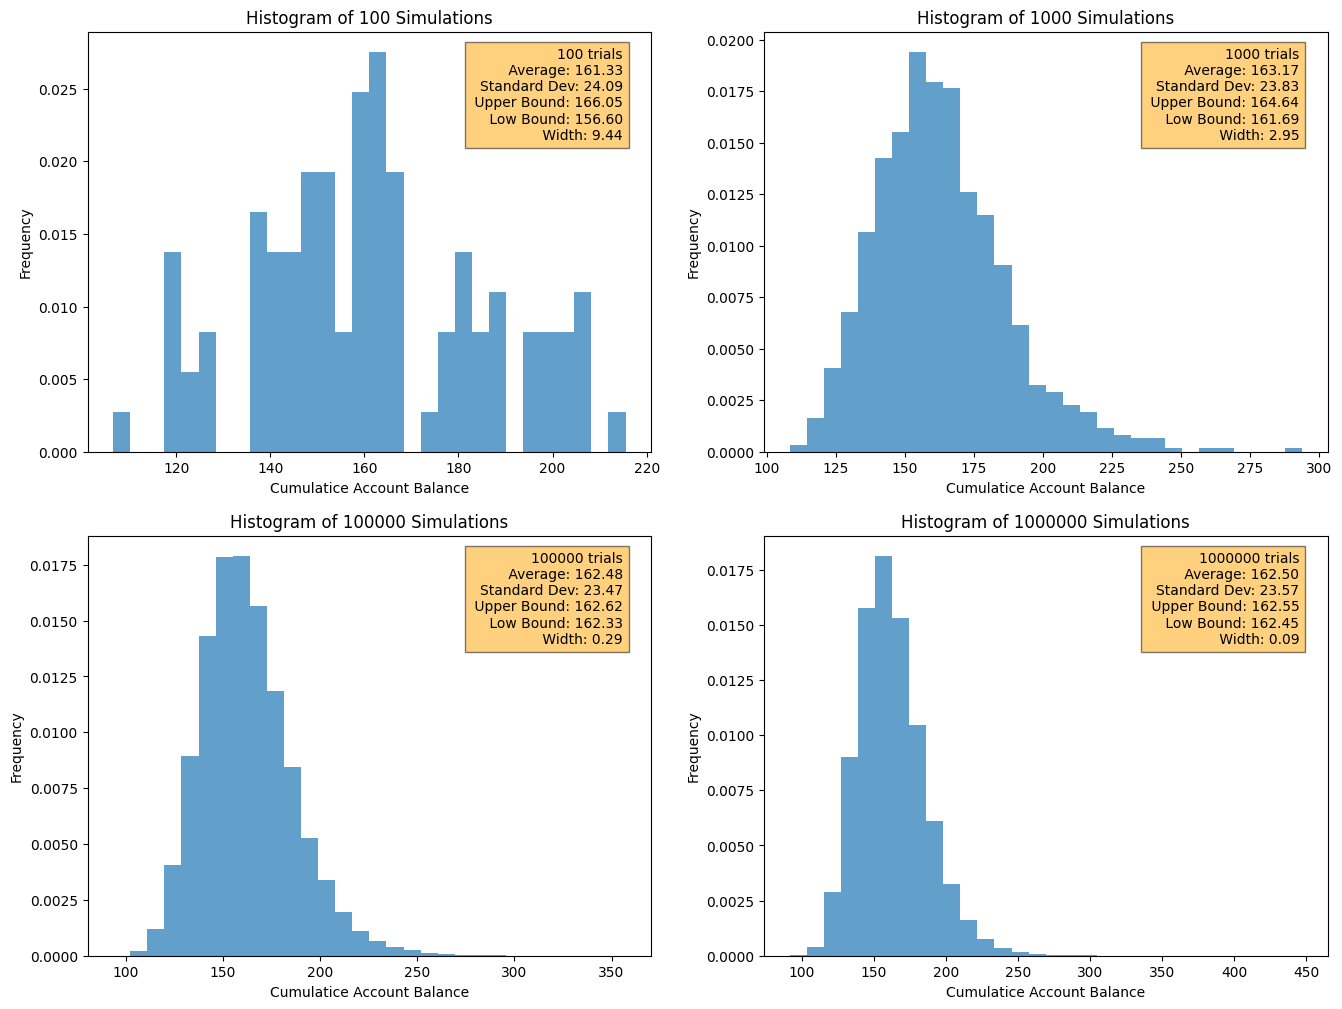

In [ ]:
# Plot four histograms
plt.figure(figsize=(16, 12))

# No. trials = 100
ax1 = plt.subplot(221)
fig1 = Hist(100)
plt.text(
    0.95,
    0.85,
    fig1,
    ha="right",
    va="center",
    fontsize=10,
    bbox={"facecolor": "orange", "alpha": 0.5},
    transform=ax1.transAxes,
)

# No. trials = 1,000
ax2 = plt.subplot(222)
fig2 = Hist(1000)
plt.text(
    0.95,
    0.85,
    fig2,
    ha="right",
    va="center",
    fontsize=10,
    bbox={"facecolor": "orange", "alpha": 0.5},
    transform=ax2.transAxes,
)

# No. trials = 100,000
ax3 = plt.subplot(223)
fig3 = Hist(100000)
plt.text(
    0.95,
    0.85,
    fig3,
    ha="right",
    va="center",
    fontsize=10,
    bbox={"facecolor": "orange", "alpha": 0.5},
    transform=ax3.transAxes,
)

# No. trials = 1,000,000
ax4 = plt.subplot(224)
fig4 = Hist(1000000)
plt.text(
    0.95,
    0.85,
    fig4,
    ha="right",
    va="center",
    fontsize=10,
    bbox={"facecolor": "orange", "alpha": 0.5},
    transform=ax4.transAxes,
)
plt.show()

Figure 4 shows the histograms of predicted account balance distribution with a different number of trials. We can see as the number of trials increases, the shape of the histogram will become more concentrated.

In figure 4, we can see as the number of trails increases, the average predicted year-end account balance converges to 162.5. We can see when the number of trials increases to 1,000 runs from 100 runs, the average drops a lot and then stays very stable around 162.5. Also, the width of the confidence intervals drops a lot from 1,000 runs to 100 runs. From these two numbers, we can say 1,000 trials are enough to get convergent results for a year-end account balance estimator.
